In [27]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()

In [28]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [29]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [30]:
df= pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [32]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [33]:
df['flower_name']=df.target.apply(lambda x : iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [34]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [35]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]

In [12]:
import matplotlib.pyplot as plt  

Sepal leanght vs sepal width (setosa vs versicolor)

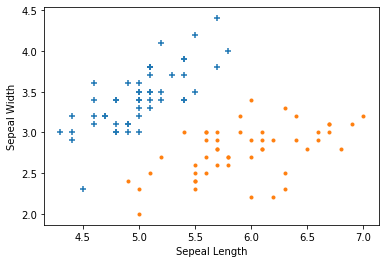

In [13]:
plt.xlabel('Sepeal Length')
plt.ylabel('Sepeal Width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],marker='.')
plt.show()

Petal lenght vs petal width (setosa vs versicolor)

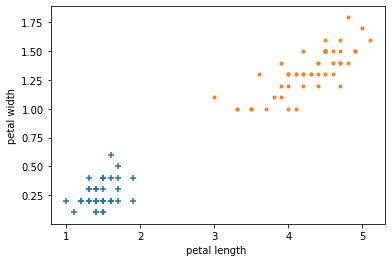

In [14]:
plt.xlabel('petal length ')
plt.ylabel('petal width')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],marker='.')
plt.show()

Training Using Support vector machine(svm)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x= df.drop(['target','flower_name'],axis='columns')
y=df.target

In [17]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

In [18]:
len(x_test)

30

In [19]:
from sklearn.svm import SVC
model=SVC()

In [20]:
model.fit(x_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [21]:
model.score(x_test,y_test)

1.0

In [22]:
model.predict([[2.8,0.2,0.5,0.3]])

array([0])

Tune parameters

1. Regularization(c)

In [23]:
model_c =SVC(C=10)
model_c.fit(x_train,y_train)
model_c.score(x_test,y_test)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9666666666666667

2. Gamma

In [24]:
model_g = SVC(gamma=10)
model_g.fit(x_train,y_train)
model_g.score(x_test, y_test)

1.0

3. Kernal

In [25]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(x_train , y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [26]:
model_linear_kernal.score(x_test,y_test)

0.9666666666666667